In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy
import pandas as pd 
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy import stats as st
from scipy.io import arff

In [2]:
attr_names = ['net profit / total assets', 'total liabilities / total assets', 'working capital / total assets'
              , 'current assets / short-term liabilities'
              , '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365'
              , 'retained earnings / total assets', 'EBIT / total assets', 'book value of equity / total liabilities'
              , 'sales / total assets', 'equity / total assets', '(gross profit + extraordinary items + financial expenses) / total assets'
              , 'gross profit / short-term liabilities', '(gross profit + depreciation) / sales', '(gross profit + interest) / total assets'
              , '(total liabilities * 365) / (gross profit + depreciation)', '(gross profit + depreciation) / total liabilities'
              , 'total assets / total liabilities', 'gross profit / total assets', 'gross profit / sales', '(inventory * 365) / sales'
              , 'sales (n) / sales (n-1)', 'profit on operating activities / total assets', 'net profit / sales', 'gross profit (in 3 years) / total assets'
              , '(equity - share capital) / total assets', '(net profit + depreciation) / total liabilities', 'profit on operating activities / financial expenses'
              , 'working capital / fixed assets', 'logarithm of total assets', '(total liabilities - cash) / sales', '(gross profit + interest) / sales'
              , '(current liabilities * 365) / cost of products sold', 'operating expenses / short-term liabilities', 'operating expenses / total liabilities'
              , 'profit on sales / total assets', 'total sales / total assets', '(current assets - inventories) / long-term liabilities'
              , 'constant capital / total assets', 'profit on sales / sales', '(current assets - inventory - receivables) / short-term liabilities'
              , 'total liabilities / ((profit on operating activities + depreciation) * (12/365))', 'profit on operating activities / sales'
              , 'rotation receivables + inventory turnover in days', '(receivables * 365) / sales', 'net profit / inventory'
              , '(current assets - inventory) / short-term liabilities', '(inventory * 365) / cost of products sold'
              , 'EBITDA (profit on operating activities - depreciation) / total assets', 'EBITDA (profit on operating activities - depreciation) / sales'
              , 'current assets / total liabilities', 'short-term liabilities / total assets', '(short-term liabilities * 365) / cost of products sold)'
              , 'equity / fixed assets', 'constant capital / fixed assets', 'working capital', '(sales - cost of products sold) / sales'
              , '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)', 'total costs /total sales'
              , 'long-term liabilities / equity', 'sales / inventory', 'sales / receivables', '(short-term liabilities *365) / sales'
              , 'sales / short-term liabilities', 'sales / fixed assets']

attr_dict = {}

for i in range (1, len(attr_names) + 1):
    attr_dict['Attr' + str(i)] = attr_names[i-1]

attr_dict_inverse = dict((v, k) for k,v in attr_dict.items())

In [3]:
data1 = arff.loadarff('1year.arff')
data2 = arff.loadarff('2year.arff')
data3 = arff.loadarff('3year.arff')
data4 = arff.loadarff('4year.arff')
data5 = arff.loadarff('5year.arff')
df_data = pd.DataFrame(data1[0])
df_data = pd.DataFrame(df_data.append(pd.DataFrame(data2[0]), ignore_index = True))
df_data = pd.DataFrame(df_data.append(pd.DataFrame(data3[0]), ignore_index = True))
df_data = pd.DataFrame(df_data.append(pd.DataFrame(data4[0]), ignore_index = True))
df_data = pd.DataFrame(df_data.append(pd.DataFrame(data5[0]), ignore_index = True))

df_data.loc[df_data['class'] == b'1','class'] = 'bankrupt'
df_data.loc[df_data['class'] == b'0','class'] = 'not bankrupt'

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\28503489.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = pd.DataFrame(df_data.append(pd.DataFrame(data2[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\28503489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = pd.DataFrame(df_data.append(pd.DataFrame(data3[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\28503489.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data = pd.DataFrame(df_data.append(pd.DataFrame(data4[0]), ignore_index = True))
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\28503489.py:10: FutureWarning: The frame.append method is deprecated and will be removed from 

In [4]:
print(df_data)

          Attr1    Attr2     Attr3    Attr4     Attr5    Attr6     Attr7  \
0      0.200550  0.37951  0.396410  2.04720   32.3510  0.38825  0.249760   
1      0.209120  0.49988  0.472250  1.94470   14.7860  0.00000  0.258340   
2      0.248660  0.69592  0.267130  1.55480   -1.1523  0.00000  0.309060   
3      0.081483  0.30734  0.458790  2.49280   51.9520  0.14988  0.092704   
4      0.187320  0.61323  0.229600  1.40630   -7.3128  0.18732  0.187320   
...         ...      ...       ...      ...       ...      ...       ...   
43400  0.012898  0.70621  0.038857  1.17220  -18.9070  0.00000  0.013981   
43401 -0.578050  0.96702 -0.800850  0.16576  -67.3650 -0.57805 -0.578050   
43402 -0.179050  1.25530 -0.275990  0.74554 -120.4400 -0.17905 -0.154930   
43403 -0.108860  0.74394  0.015449  1.08780  -17.0030 -0.10886 -0.109180   
43404 -0.105370  0.53629 -0.045578  0.91478  -56.0680 -0.10537 -0.109940   

         Attr8    Attr9    Attr10  ...    Attr56    Attr57   Attr58    Attr59  \
0     

In [5]:
df_data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [6]:

analysis =pd.concat((df_data.var().to_frame(), df_data.std().to_frame(), df_data.mean().to_frame()), axis = 1) 
analysis.columns = ['var', 'std', 'mean']

analysis.transpose()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\2505699666.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  analysis =pd.concat((df_data.var().to_frame(), df_data.std().to_frame(), df_data.mean().to_frame()), axis = 1)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\2505699666.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  analysis =pd.concat((df_data.var().to_frame(), df_data.std().to_frame(), df_data.mean().to_frame()), axis = 1)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\2505699666.py:1: FutureWarning: The d

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
var,8.964688,34.137703,29.587386,87281.499653,3.750708e+09,51.859101,32.639222,255929.023208,3960.528710,215.226425,...,4.907436e+09,2.838612e+07,186.980234,2.845639e+07,14909.495529,1.046238e+09,305863.645244,1.939521e+10,15420.015228,5.613770e+06
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2.369339e+03
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,7.278859e+01


In [7]:
df_data.apply(lambda column : column.isna().sum()).to_frame().transpose()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,8,8,8,134,89,8,8,94,9,8,...,127,7,84,7,2152,102,127,134,812,0


In [8]:
attr_dict['Attr60']

'sales / inventory'

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\3977857954.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corDataFr = df_data.corr()


<Axes: >

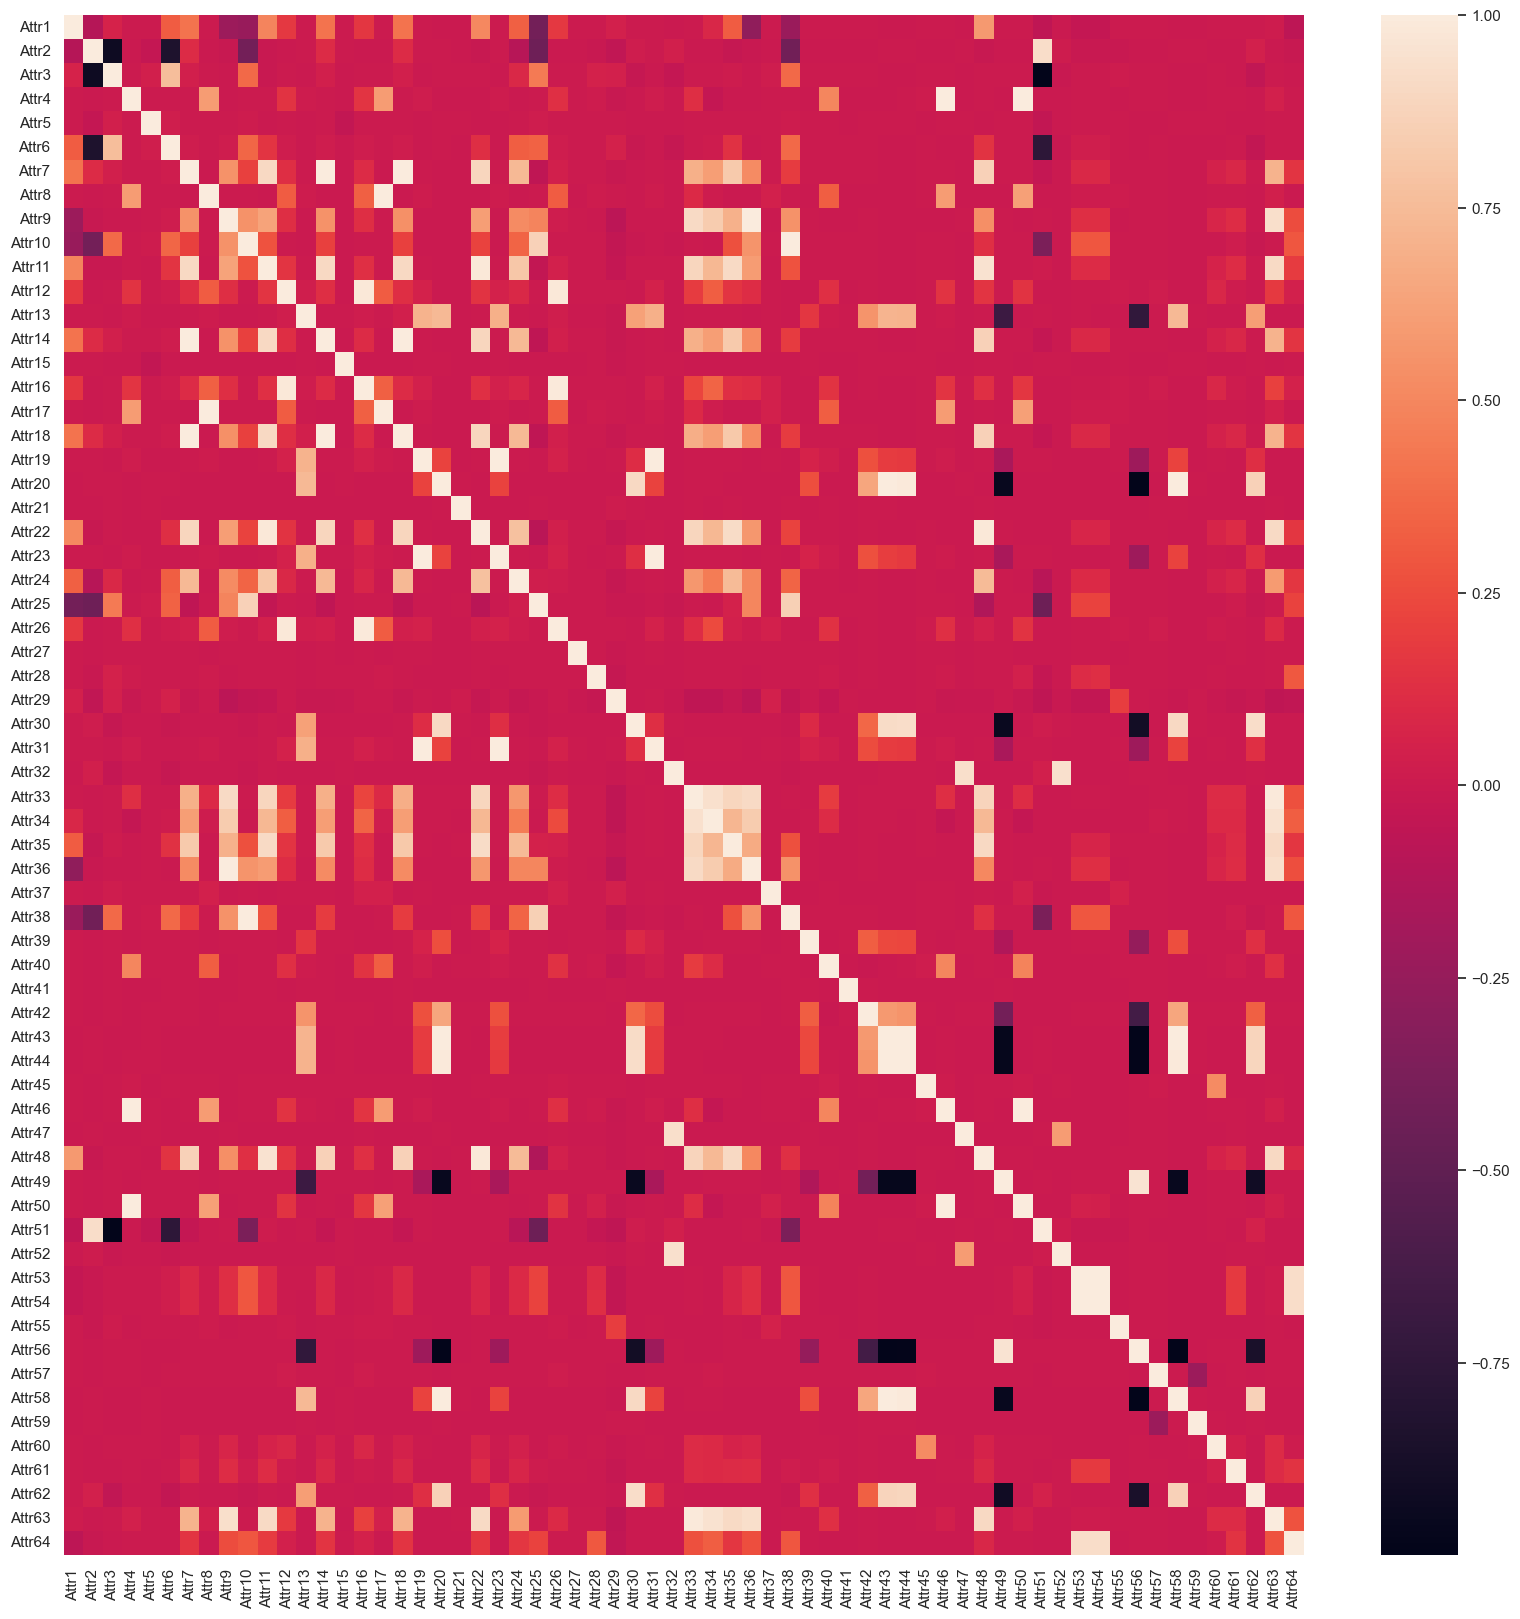

In [9]:
import seaborn as sns

corDataFr = df_data.corr()
corDataFrSortId = corDataFr.index
corDataFrSorted = corDataFr.loc[:, corDataFrSortId]
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corDataFrSorted)

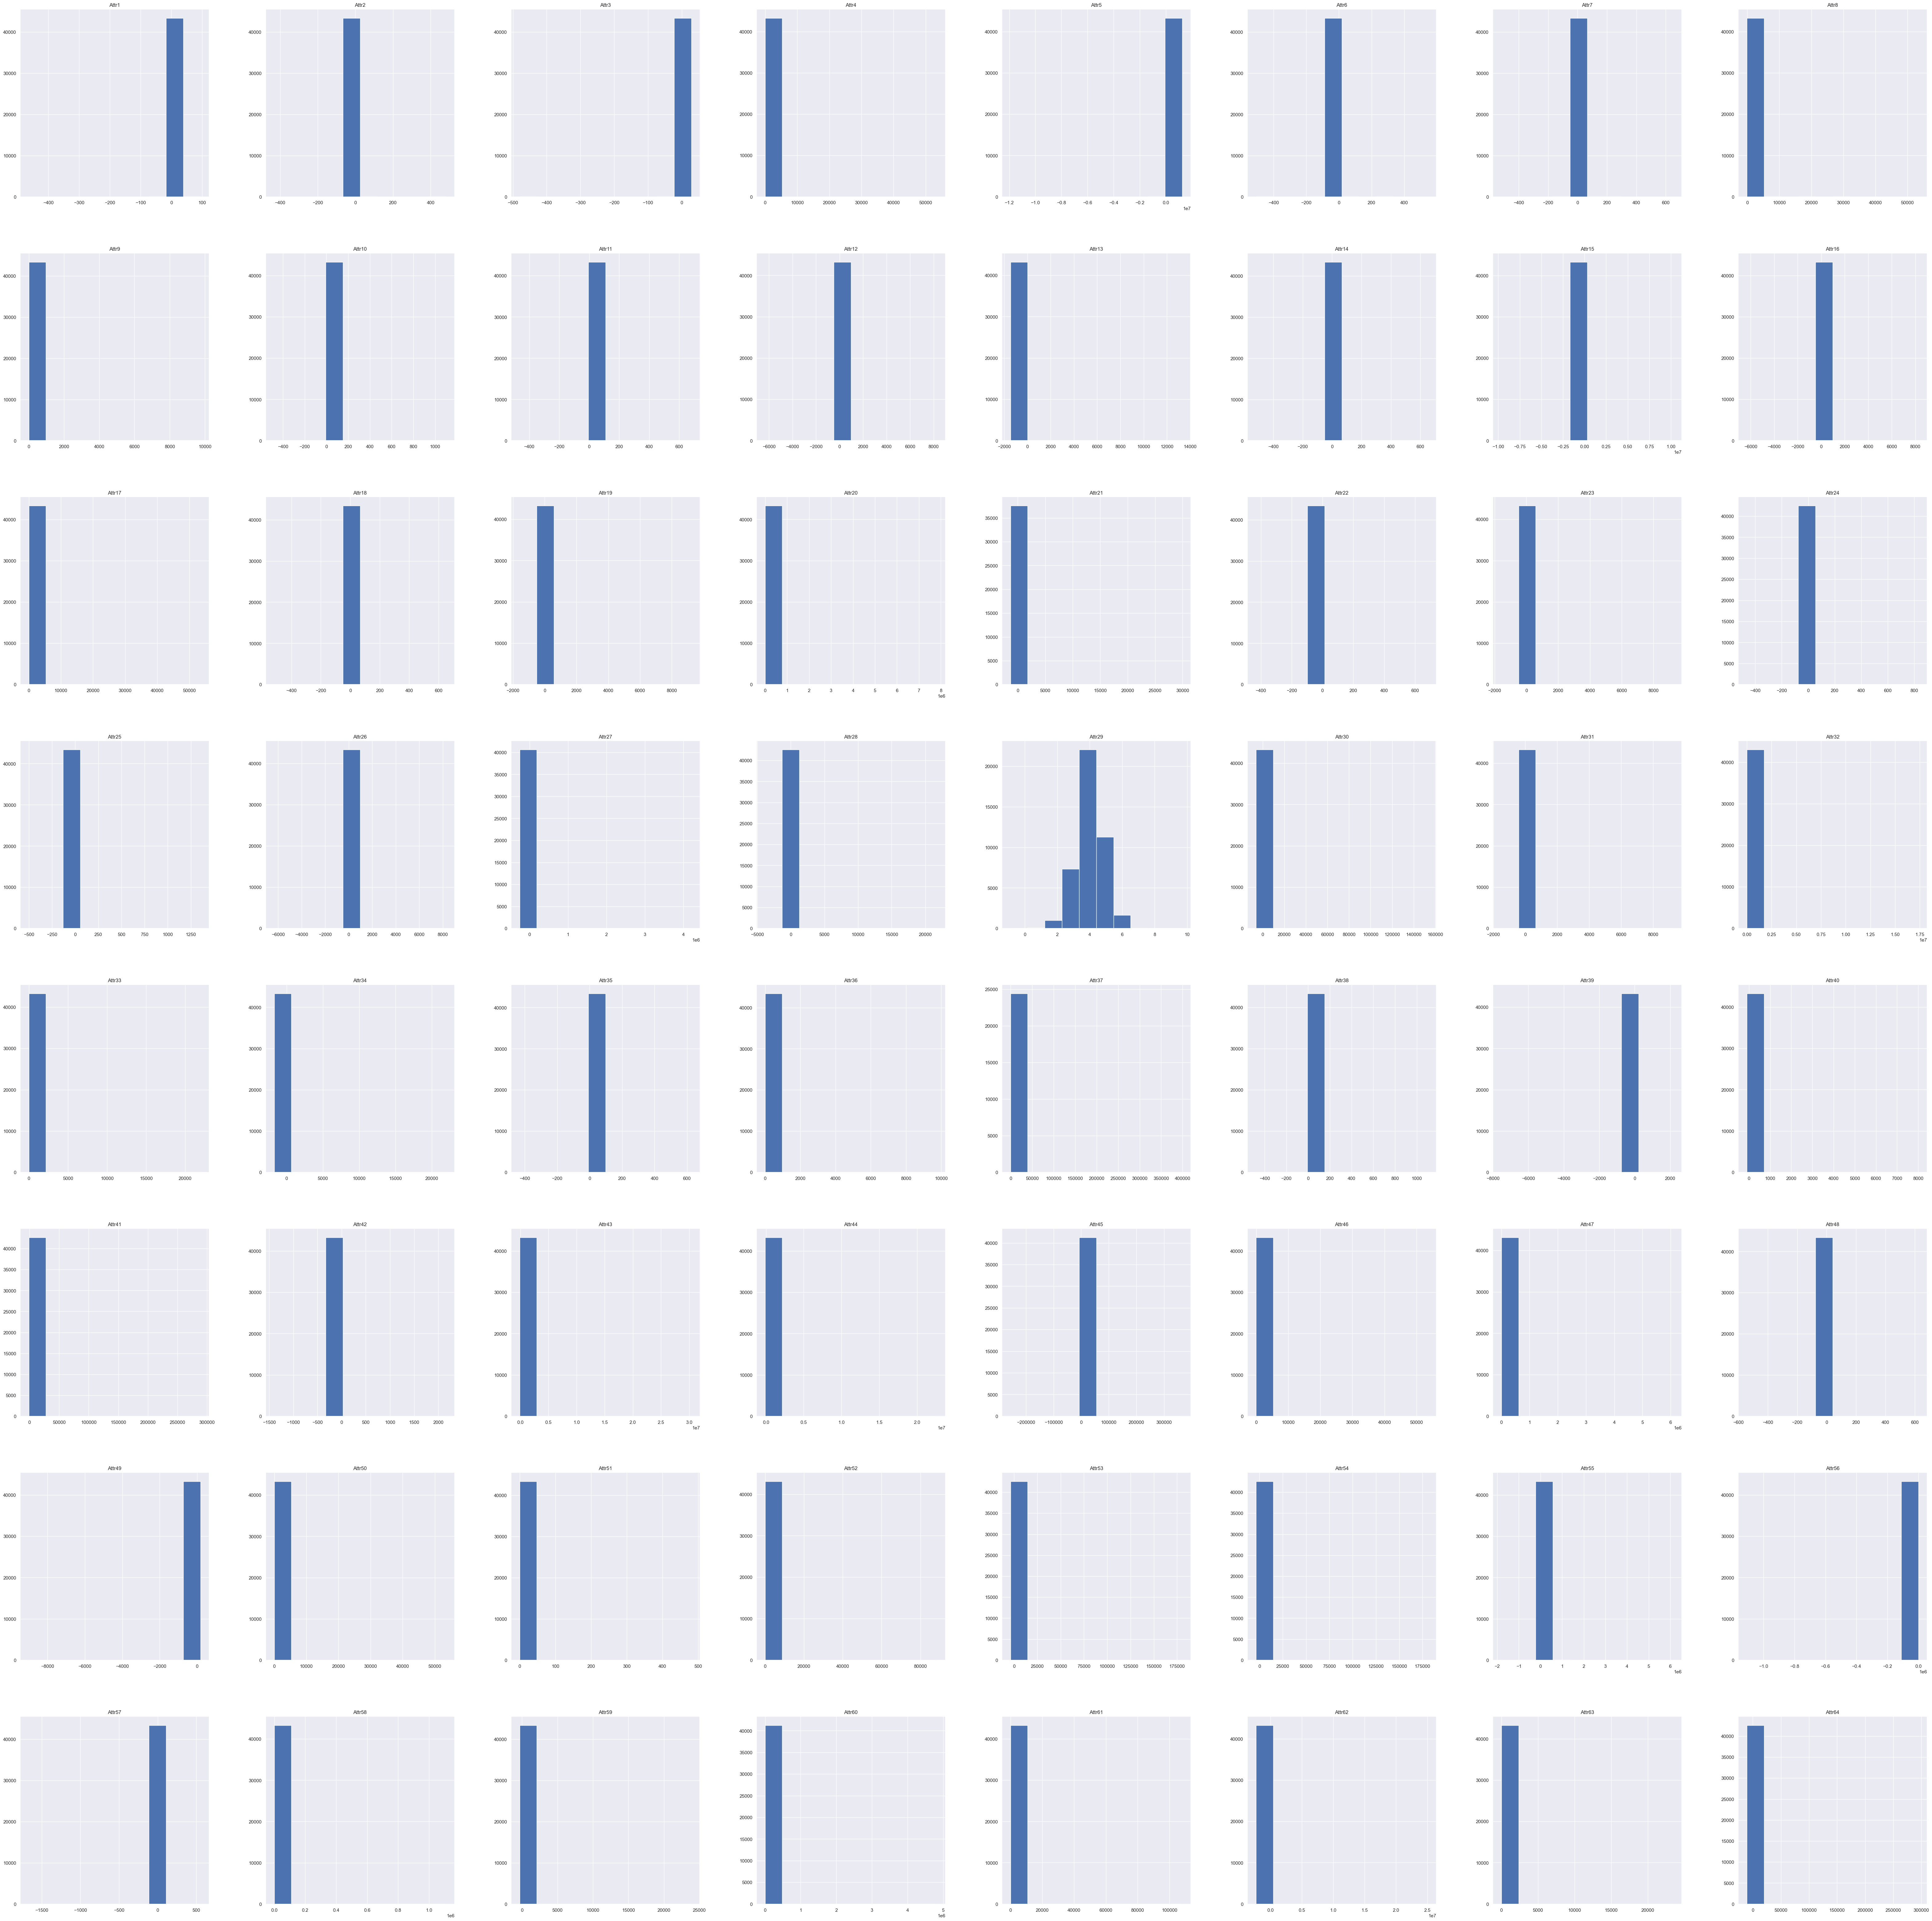

In [10]:
_ = df_data.hist(figsize = (80, 80))
plt.savefig("histograms.png")

In [11]:
df_data_bankr = df_data[df_data['class'] == 'bankrupt']
df_data_nobankr = df_data[df_data['class'] == 'not bankrupt']

for column in df_data_bankr.iloc[:, :-1]:
    df_data_bankr = df_data_bankr.fillna(df_data_bankr[column].fillna(df_data_bankr[column].mean()).to_frame())

for column in df_data_nobankr.iloc[:, :-1]:
    df_data_nobankr = df_data_nobankr.fillna(df_data_nobankr[column].fillna(df_data_nobankr[column].mean()).to_frame())

df_data_mean = df_data.fillna(df_data_bankr).fillna(df_data_nobankr)

In [12]:
df_data_bankr = df_data[df_data['class'] == 'bankrupt']
df_data_nobankr = df_data[df_data['class'] == 'not bankrupt']

for column in df_data_bankr.iloc[:, :-1]:
    df_data_bankr = df_data_bankr.fillna(df_data_bankr[column].fillna(df_data_bankr[column].median()).to_frame())

for column in df_data_nobankr.iloc[:, :-1]:
    df_data_nobankr = df_data_nobankr.fillna(df_data_nobankr[column].fillna(df_data_nobankr[column].median()).to_frame())

df_data.fillna(df_data_bankr)
df_data = df_data.fillna(df_data_bankr).fillna(df_data_nobankr)

Wizualizacja PCA i t-SNE

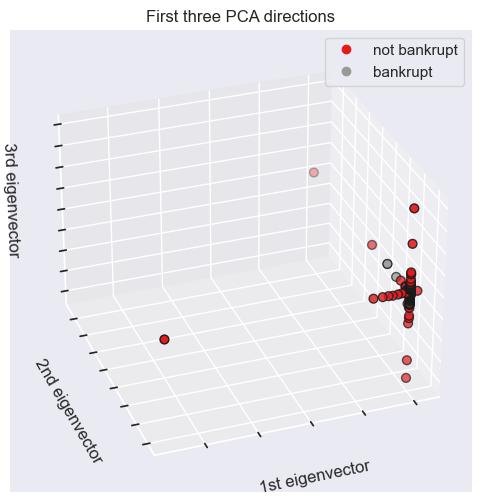

In [13]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(df_data.iloc[:, :-1])
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1], 
    X_reduced[:, 2],
    c=[1 if x == 'bankrupt' else 0 for x in df_data['class']],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

labels = df_data['class'].unique()
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in [1 if x == 'bankrupt' else 0 for x in df_data['class'].unique()]]
plt.legend(handles, labels)

plt.show()

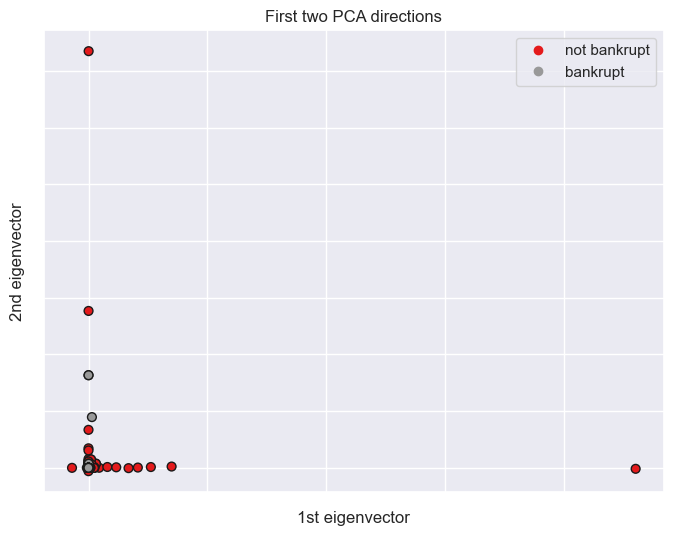

In [14]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()

X_reduced = PCA(n_components=2).fit_transform(df_data.iloc[:, :-1])
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1], 
    c=[1 if x == 'bankrupt' else 0 for x in df_data['class']],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])

labels = df_data['class'].unique()
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in [1 if x == 'bankrupt' else 0 for x in df_data['class'].unique()]]
plt.legend(handles, labels)

plt.show()

In [15]:
# from sklearn.manifold import TSNE

# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# X_reduced = TSNE(n_components=3).fit_transform(df_data.iloc[:, :-1])
# scatter = ax.scatter(
#     X_reduced[:, 0],
#     X_reduced[:, 1], 
#     X_reduced[:, 2],
#     c=[1 if x == 'bankrupt' else 0 for x in df_data['class']],
#     cmap=plt.cm.Set1,
#     edgecolor="k",
#     s=40,
# )

# #ax.scatter(X_reduced[y == 0, 1], X_reduced[y == 0, 0], color='blue', edgecolor="k", label='Iris Setosa')
# #ax.scatter(X_reduced[y == 1, 1], X_reduced[y == 1, 0], color='red', edgecolor="k", label='Iris Versicolour')
# #ax.scatter(X_reduced[y == 2, 1], X_reduced[y == 2, 0], color='yellow', edgecolor="k", label='Iris Virginica')

# ax.set_title("First three TSNE directions")
# ax.set_xlabel("1st eigenvector")
# ax.xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.zaxis.set_ticklabels([])

# labels = df_data['class'].unique()
# handles = [plt.Line2D([],[],marker="o", ls="", 
#                       color=scatter.cmap(scatter.norm(yi))) for yi in [1 if x == 'bankrupt' else 0 for x in df_data['class'].unique()]]
# plt.legend(handles, labels)

# plt.show()

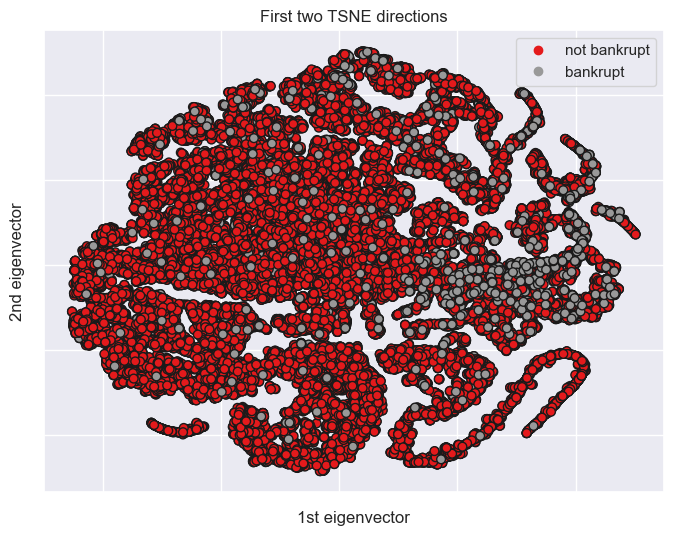

In [16]:
from sklearn.manifold import TSNE

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()

X_reduced = TSNE(n_components=2).fit_transform(df_data.iloc[:, :-1])
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1], 
    c=[1 if x == 'bankrupt' else 0 for x in df_data['class']],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First two TSNE directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])

labels = df_data['class'].unique()
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in [1 if x == 'bankrupt' else 0 for x in df_data['class'].unique()]]
plt.legend(handles, labels)

plt.show()

Dalsze czyszczenie danych

In [17]:
df_data
Q1 = df_data.quantile(0.25)
Q3 = df_data.quantile(0.75)

IQR = Q3 - Q1
IQR

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

df_data2 = df_data[~((df_data > upper) | (df_data < lower)).any(axis=1)]
# df_data2 = df_data[((df_data > upper) | (df_data < lower))]

df_data2

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\134953181.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_data.quantile(0.25)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\134953181.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_data.quantile(0.75)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16992\134953181.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_data2 = df_data[~((df_data > upper) | (df_data < lower)).any(axis=1)]


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
8,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.58223,1.33320,0.36798,...,0.180110,0.024512,0.84165,0.34094,9.9665,4.2382,116.500,3.1330,2.5603,not bankrupt
33,0.001222,0.53108,0.201300,1.54310,-44.797,0.042436,0.002745,0.87355,0.99091,0.46393,...,-0.009171,0.002635,1.00920,0.34583,4.0888,10.3480,89.081,4.0974,3.5477,not bankrupt
62,0.018510,0.75869,-0.119860,0.83860,-67.711,-0.090519,0.031603,0.31836,1.83970,0.24153,...,0.038160,0.076636,0.98291,0.00000,8.9659,4.5812,147.340,2.4772,4.8773,not bankrupt
78,0.011123,0.18941,0.369170,2.94910,47.755,0.011123,0.016622,3.32560,1.00520,0.62991,...,0.005168,0.017658,0.99483,0.00000,30.8770,7.8559,30.578,11.9370,5.1221,not bankrupt
81,0.030232,0.41512,0.094882,1.31720,-120.450,0.084006,0.044036,1.40890,1.05210,0.58488,...,0.049558,0.051690,0.95044,0.19832,5.1896,6.6222,118.830,3.0716,1.5162,not bankrupt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43296,0.034999,0.72977,-0.036695,0.94191,-60.260,0.000000,0.034433,0.37029,1.58960,0.27023,...,0.045307,0.129520,0.95280,0.24317,6.9657,11.5040,145.040,2.5166,3.9245,bankrupt
43297,-0.002445,0.56949,0.038483,1.09750,-72.746,0.000000,-0.002445,0.75583,1.11890,0.43044,...,0.013238,-0.005679,0.96577,0.39267,4.7241,6.1986,128.740,2.8351,1.9741,bankrupt
43308,0.075638,0.40351,0.006306,1.03140,-28.666,0.000000,0.086580,1.47820,1.07420,0.59649,...,0.106620,0.126810,0.91940,0.33945,15.0070,9.3041,68.309,5.3434,1.3552,bankrupt
43327,0.119110,0.50490,0.197170,1.39050,-76.361,0.000000,0.142030,0.98057,1.77980,0.49509,...,0.092460,0.240580,0.93291,0.00000,3.3242,11.0560,103.550,3.5250,5.9740,bankrupt


In [18]:
df_data2.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,...,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000
mean,0.050727,0.470124,0.151639,1.602069,-17.004994,0.038896,0.061654,1.382940,1.480301,0.507645,...,2131.528118,0.050664,0.110925,0.952738,0.177526,11.022922,7.798744,84.194217,5.214771,4.608622
std,0.050716,0.156929,0.168054,0.758787,44.189034,0.070942,0.058265,1.020990,0.633999,0.153887,...,3211.549513,0.059568,0.118544,0.054131,0.177111,7.542564,3.513926,35.876740,2.390961,3.464187
min,-0.156460,0.000000,-0.415910,0.267830,-192.800000,-0.133970,-0.156460,-0.079862,0.402210,-0.086794,...,-7414.000000,-0.165210,-0.389490,0.707260,0.000000,2.691200,2.458200,0.000000,1.646300,0.469200
25%,0.015637,0.357210,0.030896,1.072950,-43.991250,0.000000,0.021305,0.680665,1.027600,0.397970,...,198.400000,0.015572,0.031200,0.932138,0.000000,5.659325,5.178500,56.772000,3.482450,2.196000
50%,0.041946,0.471035,0.135360,1.384300,-16.315000,0.000000,0.050645,1.066450,1.133450,0.500075,...,1223.950000,0.039603,0.085301,0.964330,0.146950,8.465250,7.015850,79.254000,4.605400,3.568650
75%,0.077536,0.583653,0.259737,1.899825,9.199225,0.079857,0.093150,1.729250,1.826150,0.621333,...,3536.575000,0.075192,0.166785,0.985620,0.302840,14.038500,9.721050,104.810000,6.413225,5.871175
max,0.298820,1.086800,0.764960,5.209500,191.950000,0.223200,0.320140,5.832800,3.628000,1.000000,...,12431.000000,0.297530,0.688410,1.165200,0.589640,39.347000,19.127000,221.710000,15.755000,20.569000


In [19]:
z_threshold = 3
df_data_z_score=((df_data.iloc[:, :-1]-df_data.iloc[:, :-1].mean())/df_data.iloc[:, :-1].std()).abs()
outliers = (df_data_z_score > z_threshold)

df_data2 = df_data[~outliers.any(axis=1)]
df_data2

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,not bankrupt
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,not bankrupt
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,not bankrupt
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,not bankrupt
5,0.228220,0.49794,0.359690,1.75020,-47.7170,0.00000,0.281390,1.00830,1.97860,0.502060,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.444,4.1269,12.29900,not bankrupt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,bankrupt
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,bankrupt
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,bankrupt
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,bankrupt


In [20]:
df_data2.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,42264.000000,42264.000000,42264.000000,42264.000000,42264.00000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,...,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000
mean,0.061693,0.523181,0.187992,3.038638,-2.02163,0.004258,0.075850,3.213418,1.724685,0.459671,...,5237.298240,-0.278831,0.139531,1.951722,0.314469,71.994748,11.788502,161.327786,7.853389,20.884361
std,0.206044,0.476727,0.427600,8.612294,2994.21849,0.520487,0.218366,15.696948,1.427685,0.486513,...,21109.787974,49.903194,1.505998,81.818560,5.397831,984.219088,36.657924,2213.899858,12.189176,118.103995
min,-6.453500,0.000000,-14.989000,-0.403110,-139260.00000,-21.330000,-6.453500,-2.003200,-1.215700,-15.643000,...,-198780.000000,-8534.600000,-40.399000,-4.549700,-256.990000,-12.440000,-12.656000,-236.530000,-1.543200,-3.726500
25%,0.003930,0.271918,0.022899,1.052300,-48.63500,0.000000,0.006349,0.434103,1.019600,0.296868,...,35.330500,0.009703,0.015656,0.875800,0.000000,5.708825,4.539000,42.379500,3.123075,2.218175
50%,0.050091,0.472715,0.196200,1.567900,-1.21015,0.000000,0.060099,1.070150,1.199850,0.505210,...,1106.300000,0.053085,0.120400,0.950890,0.008054,9.848750,6.651150,71.203500,5.107850,4.283650
75%,0.129632,0.686782,0.400520,2.759125,49.44200,0.089241,0.150633,2.580000,2.063475,0.706233,...,4928.200000,0.128543,0.284687,0.992320,0.240265,19.230500,10.386000,116.432500,8.560400,9.558225
max,4.075300,16.643000,11.927000,841.760000,155870.00000,17.113000,4.075300,1424.300000,49.092000,12.602000,...,217780.000000,2.763300,39.003000,8603.500000,308.150000,90260.000000,1632.100000,205000.000000,342.000000,5825.400000


In [21]:
df_data_std=((df_data2.iloc[:, :-1]-df_data2.iloc[:, :-1].mean())/df_data2.iloc[:, :-1].std())
df_data_std = df_data_std.join(df_data2.iloc[:, -1])
df_data_std

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
1,0.715513,-0.048877,0.664776,-0.127021,0.005613,-0.008182,0.835709,-0.141264,-0.017570,0.078537,...,0.008018,0.186248,-0.013429,-0.058258,-0.068934,-0.232291,-0.024381,-0.365356,0.339554,not bankrupt
2,0.907414,0.362343,0.185075,-0.172293,0.000290,-0.008182,1.067980,-0.176879,-0.291160,-0.319808,...,0.010420,0.450338,-0.014492,0.070467,-0.068078,-0.213801,-0.012222,-0.421266,-0.132735,not bankrupt
3,0.096049,-0.452756,0.633298,-0.063379,0.018026,0.279780,0.077183,-0.085833,-0.467600,0.234031,...,0.006670,0.001686,-0.012292,-0.058258,-0.068501,-0.222975,-0.033828,-0.297854,-0.129840,not bankrupt
4,0.609711,0.188890,0.097306,-0.189536,-0.001767,0.351712,0.510475,-0.164536,-0.398397,-0.149844,...,0.008290,0.228937,-0.013280,-0.035205,-0.066648,-0.203850,-0.015411,-0.408903,-0.109957,not bankrupt
5,0.808212,-0.052946,0.401539,-0.149605,-0.015261,-0.008182,0.941266,-0.140481,0.177851,0.087128,...,0.008379,0.209189,-0.013357,-0.053997,-0.069692,-0.076207,-0.032921,-0.305721,-0.072693,not bankrupt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,-0.236817,0.383928,-0.348772,-0.216718,-0.005639,-0.008182,-0.283327,-0.178214,-0.033540,-0.340959,...,0.005992,-0.063498,-0.011483,0.175058,-0.059461,0.017554,-0.050685,-0.034628,-0.157526,bankrupt
43401,-3.104882,0.931012,-2.312540,-0.333579,-0.021823,-1.118777,-2.994520,-0.230412,-0.549768,-1.746532,...,0.004303,0.891415,-0.010849,-0.061609,0.039346,0.899410,-0.036184,-0.275604,-0.133390,bankrupt
43402,-1.168403,1.535719,-1.085084,-0.266259,-0.039549,-0.352187,-1.056851,-0.221291,-0.385088,-1.616114,...,0.008571,0.271387,-0.013452,-0.155044,-0.063139,-0.226399,0.021023,-0.500238,-0.092560,bankrupt
43403,-0.827748,0.463072,-0.403515,-0.226518,-0.005003,-0.217332,-0.847340,-0.196733,-0.616050,-0.753210,...,0.001916,-0.868016,-0.009393,1.070417,-0.059040,-0.155808,-0.035325,-0.284046,-0.168738,bankrupt


In [22]:
df_data_norm=df_data2.iloc[:, :-1].copy()
for column in df_data_norm.columns:
    df_data_norm[column] = df_data_norm[column]  / df_data_norm[column].abs().max()
      
df_data_norm = df_data_norm.join(df_data2.iloc[:, -1])
df_data_norm

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
1,0.032404,0.030035,0.031506,0.002310,0.000095,0.000000,0.040031,0.000699,0.034621,0.031828,...,0.000014,0.010397,0.000099,0.000000,0.000046,0.002006,0.000524,0.009942,0.010469,not bankrupt
2,0.038531,0.041815,0.017822,0.001847,-0.000007,0.000000,0.047890,0.000307,0.026664,0.019439,...,0.000028,0.020242,0.000089,0.002255,0.000055,0.002421,0.000655,0.007949,0.000894,not bankrupt
3,0.012626,0.018467,0.030608,0.002961,0.000333,0.007027,0.014365,0.001310,0.021533,0.036664,...,0.000006,0.003517,0.000110,0.000000,0.000051,0.002215,0.000422,0.012347,0.000953,not bankrupt
4,0.029026,0.036846,0.015318,0.001671,-0.000047,0.008782,0.029026,0.000443,0.023546,0.024725,...,0.000016,0.011988,0.000101,0.000404,0.000071,0.002644,0.000621,0.008389,0.001356,not bankrupt
5,0.035364,0.029919,0.023997,0.002079,-0.000306,0.000000,0.043603,0.000708,0.040304,0.032095,...,0.000016,0.011252,0.000100,0.000075,0.000038,0.005511,0.000431,0.012067,0.002111,not bankrupt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.001999,0.042433,0.002592,0.001393,-0.000121,0.000000,0.002166,0.000292,0.034156,0.018781,...,0.000002,0.001087,0.000118,0.004087,0.000149,0.007617,0.000240,0.021729,0.000391,bankrupt
43401,-0.089572,0.058104,-0.053429,0.000197,-0.000432,-0.027100,-0.089572,-0.000283,0.019143,-0.024934,...,-0.000008,0.036684,0.000124,-0.000059,0.001227,0.027424,0.000396,0.013140,0.000881,bankrupt
43402,-0.027745,0.075425,-0.018413,0.000886,-0.000773,-0.008394,-0.024007,-0.000183,0.023933,-0.020878,...,0.000017,0.013571,0.000099,-0.001695,0.000109,0.002138,0.001014,0.005134,0.001709,bankrupt
43403,-0.016868,0.044700,0.001031,0.001292,-0.000109,-0.005104,-0.016918,0.000088,0.017216,0.005959,...,-0.000021,-0.028904,0.000138,0.019771,0.000154,0.003723,0.000405,0.012839,0.000164,bankrupt


In [23]:
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

print('Dane standartyzowane')
reg = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split( df_data_std.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_std.iloc[:, -1]]
    , test_size=0.33, random_state=42)

reg.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in reg.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane normalizowane')
reg = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split( df_data_norm.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_norm.iloc[:, -1]]
    , test_size=0.33, random_state=42)

reg.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in reg.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))



Dane standartyzowane
              precision    recall  f1-score   support

not bankrupt       0.95      1.00      0.98     13274
    bankrupt       0.00      0.00      0.00       674

    accuracy                           0.95     13948
   macro avg       0.48      0.50      0.49     13948
weighted avg       0.91      0.95      0.93     13948

Dane normalizowane
              precision    recall  f1-score   support

not bankrupt       0.95      1.00      0.98     13274
    bankrupt       0.00      0.00      0.00       674

    accuracy                           0.95     13948
   macro avg       0.48      0.50      0.49     13948
weighted avg       0.91      0.95      0.93     13948



In [24]:
print('Dane bez outliers')
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split( df_data2.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data2.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
reg.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in reg.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane z outliers')
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split( df_data.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
reg.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in reg.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane z outliers (na = mean)')
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split( df_data_mean.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_mean.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
reg.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in reg.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

Dane bez outliers
              precision    recall  f1-score   support

not bankrupt       0.95      1.00      0.98     13274
    bankrupt       0.00      0.00      0.00       674

    accuracy                           0.95     13948
   macro avg       0.48      0.50      0.49     13948
weighted avg       0.91      0.95      0.93     13948

Dane z outliers
              precision    recall  f1-score   support

not bankrupt       0.95      1.00      0.97     13603
    bankrupt       0.15      0.00      0.01       721

    accuracy                           0.95     14324
   macro avg       0.55      0.50      0.49     14324
weighted avg       0.91      0.95      0.93     14324

Dane z outliers (na = mean)
              precision    recall  f1-score   support

not bankrupt       0.95      1.00      0.97     13603
    bankrupt       0.14      0.00      0.01       721

    accuracy                           0.95     14324
   macro avg       0.55      0.50      0.49     14324
weighted avg

In [25]:
from sklearn.neural_network import MLPClassifier

print('Dane standartyzowane')
clf = MLPClassifier(random_state=1, max_iter=300)

X_train, X_test, y_train, y_test = train_test_split( df_data_std.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_std.iloc[:, -1]]
    , test_size=0.33, random_state=42)

clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane normalizowane')
clf = MLPClassifier(random_state=1, max_iter=300)

X_train, X_test, y_train, y_test = train_test_split( df_data_norm.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_norm.iloc[:, -1]]
    , test_size=0.33, random_state=42)

clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))


Dane standartyzowane


c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

not bankrupt       0.97      0.99      0.98     13274
    bankrupt       0.65      0.30      0.41       674

    accuracy                           0.96     13948
   macro avg       0.81      0.64      0.69     13948
weighted avg       0.95      0.96      0.95     13948

Dane normalizowane
              precision    recall  f1-score   support

not bankrupt       0.95      1.00      0.97     13274
    bankrupt       0.42      0.04      0.07       674

    accuracy                           0.95     13948
   macro avg       0.68      0.52      0.52     13948
weighted avg       0.93      0.95      0.93     13948



c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:

print('Dane bez outliers')
clf = MLPClassifier(random_state=1, max_iter=300)
X_train, X_test, y_train, y_test = train_test_split( df_data2.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data2.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane z outliers')
clf = MLPClassifier(random_state=1, max_iter=300)
X_train, X_test, y_train, y_test = train_test_split( df_data.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane z outliers (na = mean)')
clf = MLPClassifier(random_state=1, max_iter=300)
X_train, X_test, y_train, y_test = train_test_split( df_data_mean.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_mean.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test


print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

Dane bez outliers
              precision    recall  f1-score   support

not bankrupt       0.96      0.96      0.96     13274
    bankrupt       0.18      0.16      0.17       674

    accuracy                           0.92     13948
   macro avg       0.57      0.56      0.56     13948
weighted avg       0.92      0.92      0.92     13948

Dane z outliers
              precision    recall  f1-score   support

not bankrupt       0.95      0.99      0.97     13603
    bankrupt       0.27      0.06      0.10       721

    accuracy                           0.94     14324
   macro avg       0.61      0.53      0.54     14324
weighted avg       0.92      0.94      0.93     14324

Dane z outliers (na = mean)
              precision    recall  f1-score   support

not bankrupt       0.96      0.91      0.94     13603
    bankrupt       0.15      0.30      0.20       721

    accuracy                           0.88     14324
   macro avg       0.56      0.61      0.57     14324
weighted avg

In [27]:
from sklearn.tree import DecisionTreeClassifier

print('Dane standartyzowane')
clf = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split( df_data_std.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_std.iloc[:, -1]]
    , test_size=0.33, random_state=42)

clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane normalizowane')
clf = DecisionTreeClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split( df_data_norm.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_norm.iloc[:, -1]]
    , test_size=0.33, random_state=42)

clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))




Dane standartyzowane
              precision    recall  f1-score   support

not bankrupt       0.99      0.99      0.99     13274
    bankrupt       0.73      0.73      0.73       674

    accuracy                           0.97     13948
   macro avg       0.86      0.86      0.86     13948
weighted avg       0.97      0.97      0.97     13948

Dane normalizowane
              precision    recall  f1-score   support

not bankrupt       0.99      0.98      0.98     13274
    bankrupt       0.69      0.71      0.70       674

    accuracy                           0.97     13948
   macro avg       0.84      0.85      0.84     13948
weighted avg       0.97      0.97      0.97     13948



In [28]:
print('Dane bez outliers')
clf = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split( df_data2.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data2.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane z outliers')
clf = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split( df_data.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

print('Dane z outliers (na = mean)')
clf = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split( df_data_mean.iloc[:, :-1]
    , [ 1 if x == 'bankrupt' else 0 for x in df_data_mean.iloc[:, -1]]
    , test_size=0.33, random_state=42)
    
clf.fit(X_train, y_train)

prediction = [1 if x > 0.5 else 0 for x in clf.predict(X_test)]
real_data = y_test

print(classification_report(real_data, prediction, target_names=['not bankrupt', 'bankrupt']))

Dane bez outliers
              precision    recall  f1-score   support

not bankrupt       0.99      0.99      0.99     13274
    bankrupt       0.74      0.73      0.74       674

    accuracy                           0.97     13948
   macro avg       0.87      0.86      0.86     13948
weighted avg       0.97      0.97      0.97     13948

Dane z outliers
              precision    recall  f1-score   support

not bankrupt       0.99      0.98      0.99     13603
    bankrupt       0.71      0.79      0.75       721

    accuracy                           0.97     14324
   macro avg       0.85      0.89      0.87     14324
weighted avg       0.98      0.97      0.97     14324

Dane z outliers (na = mean)
              precision    recall  f1-score   support

not bankrupt       0.99      0.99      0.99     13603
    bankrupt       0.80      0.82      0.81       721

    accuracy                           0.98     14324
   macro avg       0.90      0.90      0.90     14324
weighted avg

Wyniki:
Standartyzacja ogólnie daje lepsze wyniki niż normalizacja, ale każda metoda jest lepsza niż jej brak (wyjątek drzewo decyzyjne).

Wartości odstające są niejednoznaczne, w niektórych przypadkach ich usunięcie polepsza klasyfikacje, w innych robi gorzej.

Były porównane dwie strategii uzupełnienia danych, używanie mediany i średniej wartości atrybutu dla klasy. W przypadku drzewa decyzyjnego używanie średniej daje lepsze rezultaty niż mediana, dla pozostałych wybranych metod lepiej działa strategia mediany.
